## Evaluate the different scalers used

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats
import re
import json
import os
import datetime
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
from scipy import stats

/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = 'data/PROCESSED/MODEL_OUTPUTS'
df_norm = 'all_lstm-32-var-mean_60m_w48_24_20_performance_times.csv'
df_minmax = 'all_lstm-32-var-minmax_60m_w48_24_20_performance_times.csv'
df_robust = 'all_lstm-32-var-robust_60m_w48_24_20_performance_times.csv'
df_power = 'all_lstm-32-var-power_60m_w48_24_20_performance_times.csv'
df_stand = 'all_lstm-32-var-stand_60m_w48_24_20_performance_times.csv'

In [3]:
norm = pd.read_csv(f'{path}/{df_norm}')
mm = pd.read_csv(f'{path}/{df_minmax}')
rb= pd.read_csv(f'{path}/{df_robust}')
pw= pd.read_csv(f'{path}/{df_power}')
st= pd.read_csv(f'{path}/{df_stand}')

In [4]:
norm['scaler']= 'stand'
mm['scaler']='minmax'
rb['scaler']='robust'
pw['scaler']='power'
#st['scaler']='stand'
results = norm.append(mm).append(rb).append(pw)

In [5]:
variables = results['Unnamed: 1'].unique()
variables

array(['ATAvg_gua', 'ATAvg_ban', 'ATAvg_aer', 'ATAvg_qui', 'ATAvg_chi',
       'ATAvg_AJS', 'ATAvg_JAl', 'ATAvg_pfc', 'ATAvg_cal', 'ATAvg_mul',
       'ATAvg_pam', 'ATAvg_tas', 'ATAvg_pis', 'ATAvg_cun', 'RHAvg_gua',
       'RHAvg_ban', 'RHAvg_aer', 'RHAvg_qui', 'RHAvg_chi', 'RHAvg_AJS',
       'RHAvg_JAl', 'RHAvg_pfc', 'RHAvg_cal', 'RHAvg_mul', 'RHAvg_pam',
       'RHAvg_tas', 'RHAvg_pis', 'RHAvg_cun'], dtype=object)

In [6]:
results.scaler.unique()

array(['stand', 'minmax', 'robust', 'power'], dtype=object)

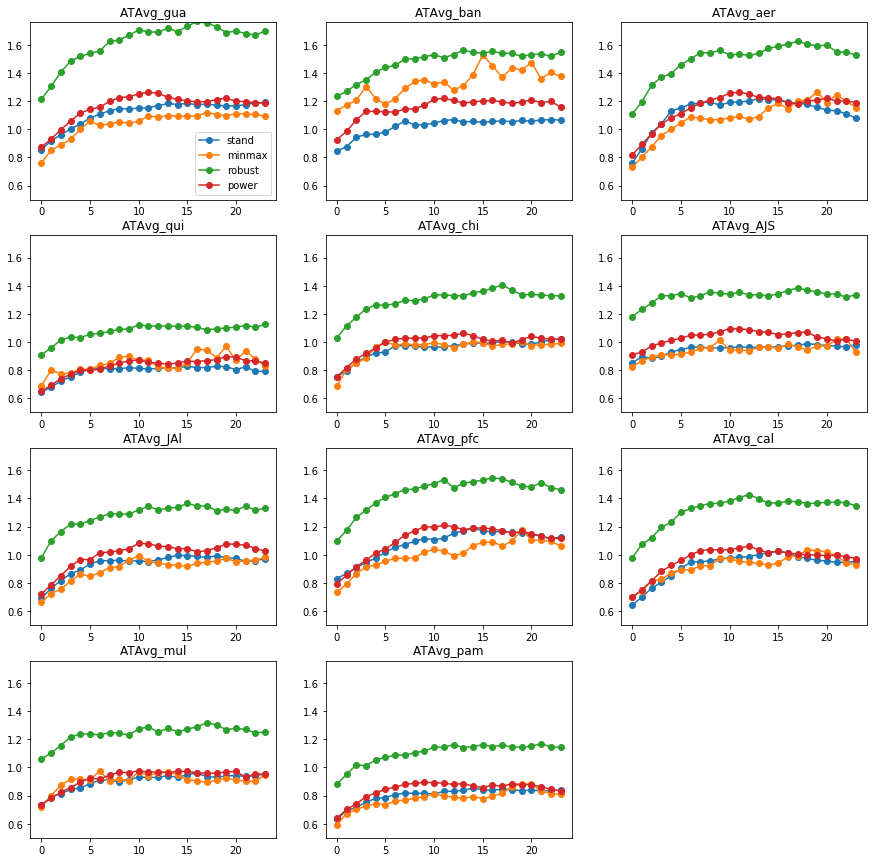

In [8]:
## ATAVG
r = re.compile(f'ATAvg.*') # only csv files
variables = list(filter(r.match, results['Unnamed: 1'].unique()))

fig, axes = plt.subplots(4,3,figsize = (15,15))
fig.delaxes(axes[3,2])
for a, ax in enumerate(axes.flatten()):
    df = results[results['Unnamed: 1'] == variables[a]]
    for scaler in df.scaler.unique():
        val_index =df.index[df['scaler']==scaler].values[0]
        y = json.loads(df[df['scaler']==scaler].mae[val_index])
        x= list(range(24))
        ax.plot(x,y,'-o',label=scaler)
        ax.set_title(variables[a])
        ax.set_ylim(0.5,1.76)
        if a==0:
            ax.legend()
plt.savefig(f'{path}/scalers_ATAvg.png', dpi = 100,bbox_inches='tight')

In [54]:
variables

['ATAvg_gua',
 'ATAvg_ban',
 'ATAvg_aer',
 'ATAvg_qui',
 'ATAvg_chi',
 'ATAvg_AJS',
 'ATAvg_JAl',
 'ATAvg_pfc',
 'ATAvg_cal',
 'ATAvg_mul',
 'ATAvg_pam',
 'ATAvg_tas',
 'ATAvg_pis',
 'ATAvg_cun']

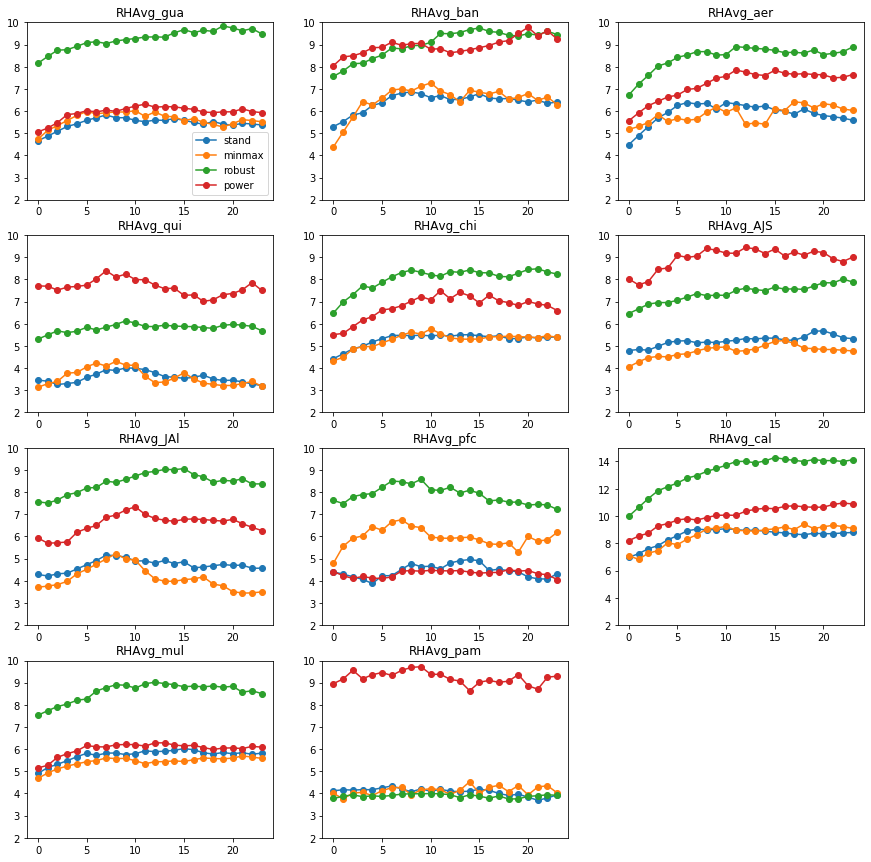

In [7]:
## RHAvg
r = re.compile(f'RHAvg.*') # only csv files
variables = list(filter(r.match, results['Unnamed: 1'].unique()))

fig, axes = plt.subplots(4,3,figsize = (15,15))
fig.delaxes(axes[3,2])
for a, ax in enumerate(axes.flatten()):
    df = results[results['Unnamed: 1'] == variables[a]]
    for scaler in df.scaler.unique():
        val_index =df.index[df['scaler']==scaler].values[0]
        y = json.loads(df[df['scaler']==scaler].mae[val_index])
        x= list(range(24))
        ax.plot(x,y,'-o',label=scaler)
        ax.set_title(variables[a])
        if a ==8:
            ax.set_ylim(2,15)
        else:
            ax.set_ylim(2,10)
        if a==0:
            ax.legend()
plt.savefig(f'{path}/scalers_RHAvg.png', dpi = 100,bbox_inches='tight')

## Test with real window for each station

In [15]:
train_df= pd.read_csv('data/PROCESSED/TRAIN_TEST_VAL/all_train_df_raw.csv')
test_df= pd.read_csv('data/PROCESSED/TRAIN_TEST_VAL/all_test_df_raw.csv')
val_df= pd.read_csv('data/PROCESSED/TRAIN_TEST_VAL/all_val_df_raw.csv')

In [4]:
r = re.compile(f'ATAvg.*') # only csv files
variables = list(filter(r.match, df.columns))
df[variables].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ATAvg_gua,5194.0,17.405516,3.397354,7.44,14.91,16.51,19.9075,26.60
ATAvg_ban,5194.0,18.155358,2.633034,12.34,16.19,17.37,20.0800,24.83
ATAvg_aer,5194.0,14.530541,3.193515,5.00,12.22,13.47,16.7675,23.35
ATAvg_qui,5194.0,7.611228,1.791690,2.84,6.34,7.23,8.8500,12.12
ATAvg_chi,5194.0,7.050025,2.354331,0.63,5.53,6.67,8.6700,12.61
ATAvg_AJS,5194.0,12.859342,2.647279,5.49,11.00,12.03,14.6775,19.60
ATAvg_JAl,5194.0,13.060740,2.750346,5.34,11.11,12.19,14.9900,20.12
ATAvg_pfc,5194.0,13.243154,3.000695,5.00,11.02,12.52,15.2500,21.07
ATAvg_cal,5194.0,9.062761,2.381347,1.79,7.37,8.55,10.7400,14.97
ATAvg_mul,5194.0,6.562870,2.089834,0.64,5.22,6.27,8.0800,11.51


In [7]:
test_df.set_index('Date_Time', inplace =True)
test_df.index = pd.to_datetime(test_df.index)

In [8]:
## Select variables of interest
r = re.compile(f'ATAvg.*') # only csv files
temp = list(filter(r.match, list(test_df.columns))) 

r = re.compile(f'RHAvg.*') # only csv files
rh = list(filter(r.match, list(test_df.columns))) 

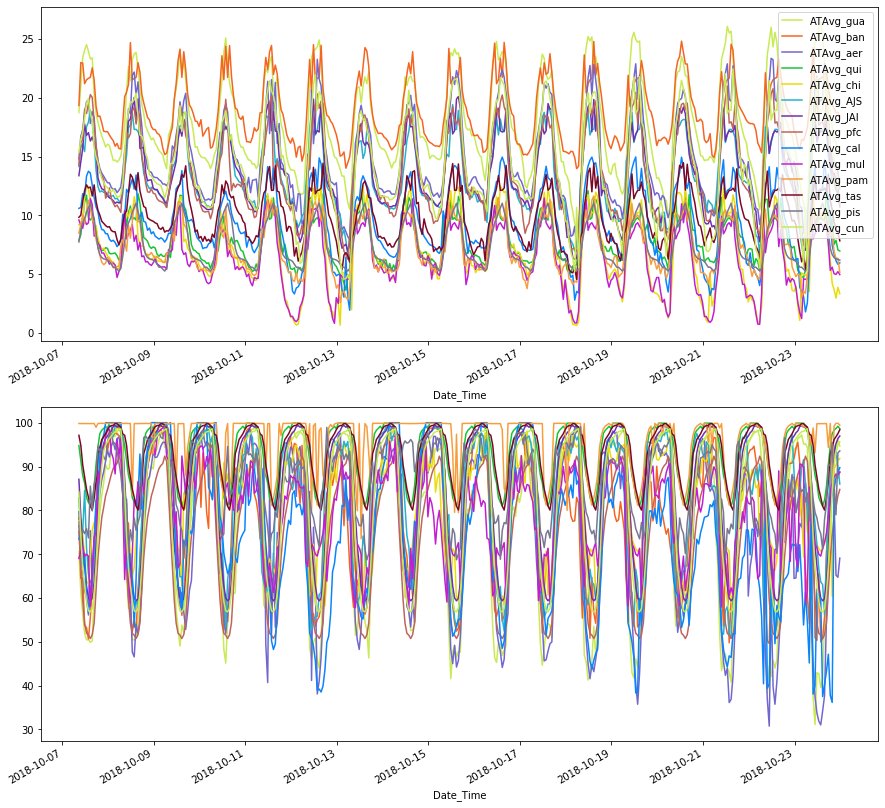

In [9]:
### Plot temperature
 # View corrected values
colors = ['#c8ea53','#f56420','#7167ce','#15c534','#e9dc09','#25b2ca','#702dae','#be645b',
         '#0884fc','#c21ed0','#f89d3d','#7c0725','#797691','#c8ea53']
model_color = dict(zip(temp,colors))

fig, axes = plt.subplots(2,1,figsize= (15,15))
for a in range(0,len(temp)):
    test_df[temp[a]][700:1100].plot(ax = axes[0],color = model_color[temp[a]])
    test_df[rh[a]][700:1100].plot(ax = axes[1],color = model_color[temp[a]])
    axes[0].legend()
#plt.savefig(f'{path}/{station}_temp_rh.png', dpi = 100,bbox_inches='tight')

In [32]:
### Find batches that have low temperature
### There are 21 batches of 256 samples (inputs+labels)
df = test_df[0::256]

In [40]:
df[3:4].index ## we want batch size 3 (that starts 2018-10-10 until 2018-10-20)

DatetimeIndex(['2018-10-10 04:45:00'], dtype='datetime64[ns]', name='Date_Time', freq=None)